# Answering our Questions with Visualizations.
* These were some of the visualizations tools used in the process of answering our questions:
* Violin plot
* Box plot
* Bar chart 
* Scatter plot 
These visualization added a unique insight into the data and the events surrounding the Indian startup ecosystem.It was a satisfactory overview of our hypothesis test and verification of the facts associated with the data.
* Further analysis were done to check analyse the data


In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data for each year
df_2018 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2018.csv')
df_2019 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2019.csv')
df_2020 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2020.csv')
df_2021 = pd.read_csv('../Edinburgh-Indian-Start-up-Project\Clean_Data\clean-startup-2021.csv')

In [3]:
# concatenate all the dataframes into one
df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Analysis and Visualization


## Question 1: Do companies in certain sectors tend to receive more funding than others?
## We will start by analyzing the distribution of funding amounts across different sectors.

C:\Users\X1 CARBON\AppData\Local\Temp\ipykernel_1256\2625323888.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_df = top_10_df.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)


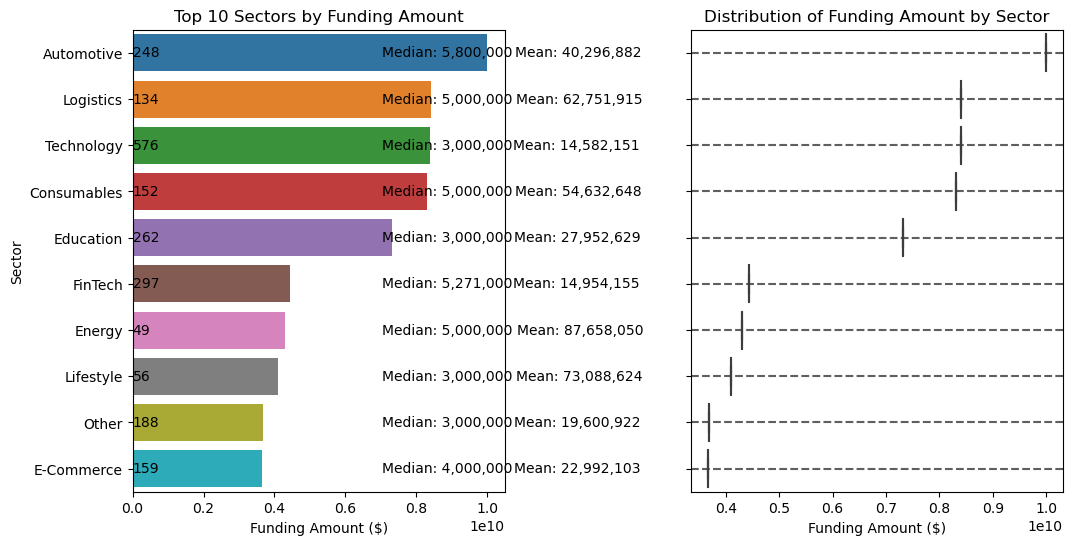

In [4]:
# Get top 10 sectors by funding amount
top_10_sectors = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10).index

top_10_df = df[df['Sector'].isin(top_10_sectors)]

# Sort the top 10 sectors by funding amount in descending order
top_10_df = top_10_df.groupby('Sector')['Amount($)', 'Company/Brand'].agg({'Amount($)': 'sum', 'Company/Brand': 'count'}).reset_index().sort_values(by='Amount($)', ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

sns.barplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax1)

ax1.set_title('Top 10 Sectors by Funding Amount')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Sector')

# Add annotations for the number of companies
for i, (value, sector) in enumerate(zip(top_10_df['Company/Brand'], top_10_df['Sector'])):
    ax1.text(value, i, f'{value:,}', va='center')

# Create boxplot for funding amount by sector
sns.boxplot(x='Amount($)', y='Sector', data=top_10_df, ax=ax2)

# Set plot title and axis labels for boxplot
ax2.set_title('Distribution of Funding Amount by Sector')
ax2.set_xlabel('Funding Amount ($)')
ax2.set_ylabel('')

# Add mean and median lines for each sector to boxplot
for i, sector in enumerate(top_10_df['Sector']):
    sector_data = df[df['Sector'] == sector]['Amount($)']
    mean = sector_data.mean()
    median = sector_data.median()
    ax2.axhline(i, linestyle='--', color='gray', alpha=0.5)
    ax2.axhline(i, linestyle='--', color='black', alpha=0.5)
    ax2.text(mean, i, f'Mean: {mean:,.0f}', va='center', ha='left', fontsize=10)
    ax2.text(median, i, f'Median: {median:,.0f}', va='center', ha='right', fontsize=10)

# Add space between subplots and adjust layout
fig.subplots_adjust(wspace=0.5)

# Show plot
plt.show()


### The combined bar and boxplot provides a comprehensive overview of the funding distribution of the top 10 sectors. The bar plot shows the total funding amount for each sector, while the boxplot provides information about the distribution of funding amounts within each sector, including the median, interquartile range, and outliers.

# Question 2: Is there a correlation between the stage of development of a company and the amount of funding it receives?
## We will use a scatter plot to visualize the relationship between the stage and funding amount and calculate the correlation coefficient.

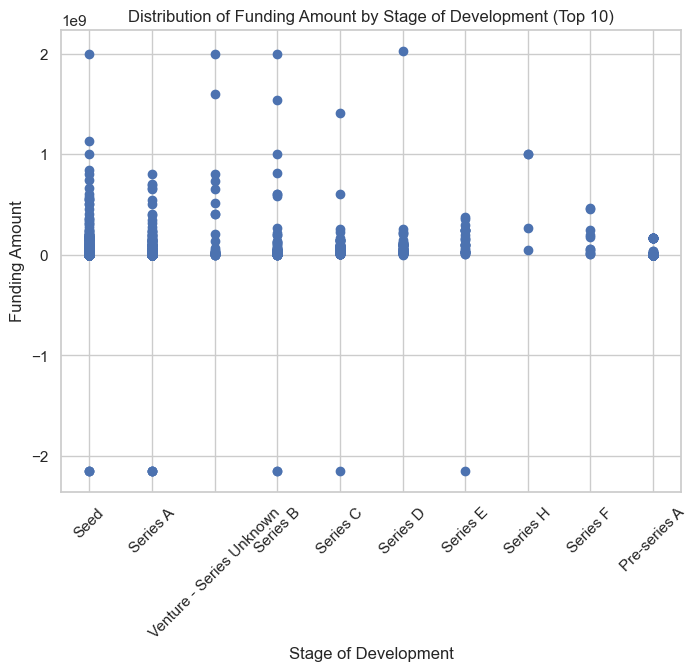

In [5]:
# Rename the 'Amount($)' column to 'Amount'
# df = df.rename(columns={'Amount($)': 'Amount'})

# Calculate the total funding amount by stage of development
stage_totals = df.groupby('Stage')['Amount($)'].sum().reset_index()

# Select the top 10 stages by funding amount
top_stages = stage_totals.sort_values('Amount($)', ascending=False).head(10)['Stage'].tolist()

# Create a new DataFrame that only includes the top 10 stages
df_top = df[df['Stage'].isin(top_stages)]

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x='Stage', y='Amount($)', data=df_top)
plt.xlabel('Stage of Development')
plt.ylabel('Funding Amount')
plt.title('Distribution of Funding Amount by Stage of Development (Top 10)')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=45)

plt.show()

### The scatter plot shows the distribution of funding amount by stage of development for the top 10 stages. It appears that the later stages of development, such as Series D, have the highest funding amounts, while the early stages, such as Seed and Series A, have relatively lower funding amounts. This is consistent with the general trend in the startup industry where companies require more funding as they progress through various stages of development. However, it's worth noting that there are some outliers in each stage, indicating that funding amount is not solely determined by the stage of development.

## Question 3.
## Are companies with more founders more likely to receive larger amounts of funding?

## We're going use the bar chart and different distributive visuals to answer this question.

In [6]:
df1 = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

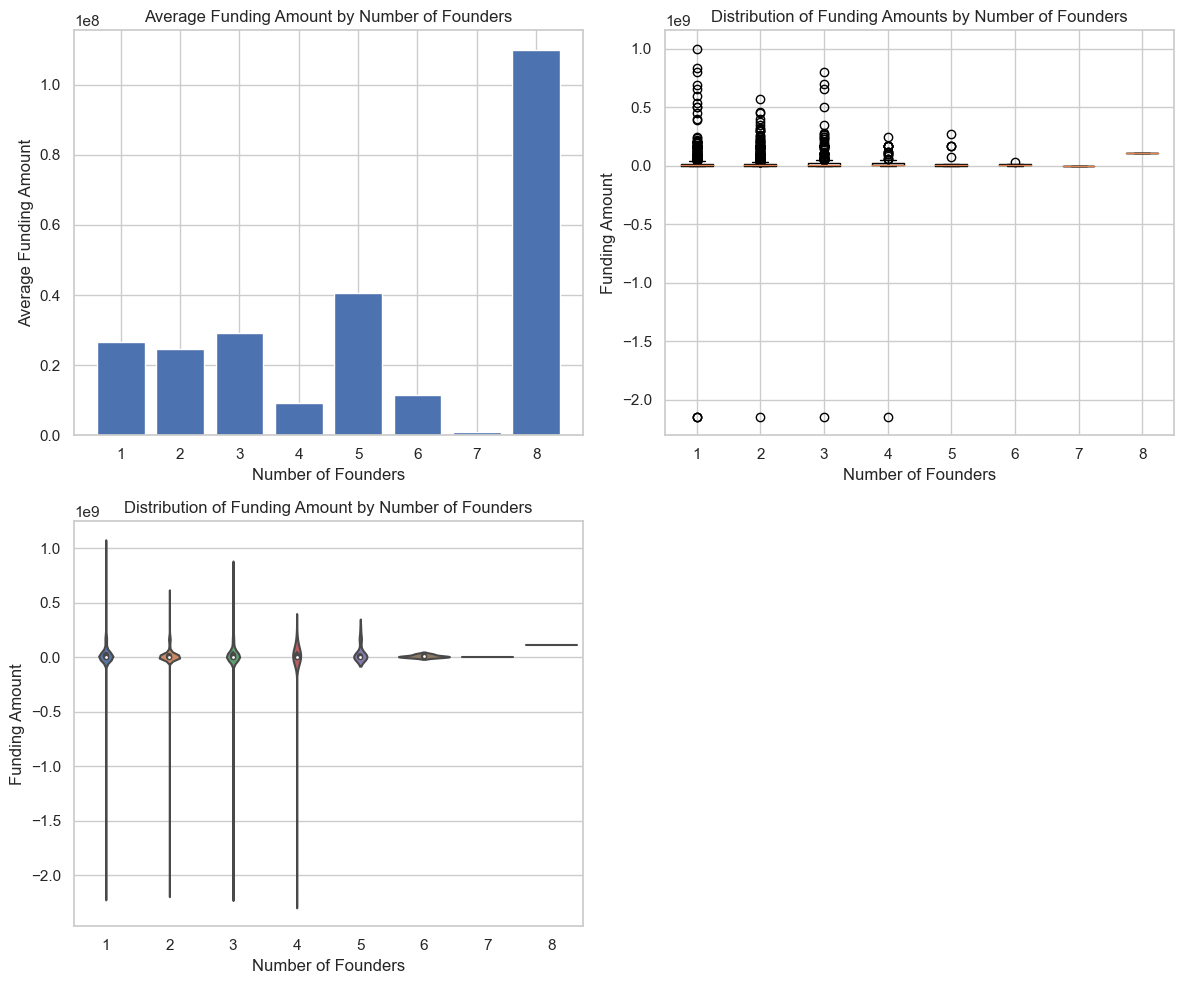

In [7]:
df1 = df1.dropna(subset=['Founders'])

df1['Founders'] = df1['Founders'].astype(str)

# Split the founders column into a list of founders
df1['Founders'] = df1['Founders'].str.split(',')

# Create a new column for the number of founders
df1['NumFounders'] = df1['Founders'].apply(lambda x: len(x))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart - Top left
grouped = df1.groupby('NumFounders')['Amount($)'].mean()
axs[0, 0].bar(grouped.index, grouped.values)
axs[0, 0].set_xlabel('Number of Founders')
axs[0, 0].set_ylabel('Average Funding Amount')
axs[0, 0].set_title('Average Funding Amount by Number of Founders')

grouped = df1.groupby('NumFounders')['Amount($)'].apply(list)
axs[0, 1].boxplot(grouped.values, labels=grouped.index)
axs[0, 1].set_title('Distribution of Funding Amounts by Number of Founders')
axs[0, 1].set_xlabel('Number of Founders')
axs[0, 1].set_ylabel('Funding Amount')

sns.violinplot(x='NumFounders', y='Amount($)', data=df1, ax=axs[1, 0])
axs[1, 0].set_xlabel('Number of Founders')
axs[1, 0].set_ylabel('Funding Amount')
axs[1, 0].set_title('Distribution of Funding Amount by Number of Founders')

# Remove empty subplot - Bottom right
fig.delaxes(axs[1, 1])

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


 From the bar chart, we can see that the average funding amount generally increases as the number of founders increases in most cases, with the 8th number of founders having the highest average funding amount. This suggests a positive relationship between the number of founders and funding amounts.
 
However, the box plot provides additional information about the distribution of funding amounts for each number of founders.The box plot for the 8th number of founders does not have a long tail on the top and bottom (indicating a narrow distribution), it suggests that the funding amounts for companies with 8 founders tend to be more concentrated around the median, with fewer extreme values.  On the other hand,the box plot for 1 number of founders has the longest tail, it indicates a wider distribution of funding amounts for companies with only 1 founder.

A weak negative correlation between the number of founders and funding amounts, it indicates that there is a tendency for companies with more founders to receive slightly lower funding amounts on average. This finding contrasts with the observation from the bar chart, where the average funding amount increased as the number of founders increased.

## Question 4
## Are there any patterns in the location of a company's headquarters and the amount of funding it receives?

## The Quest will be use some form of bar chart to compare the average funding with respect to location.

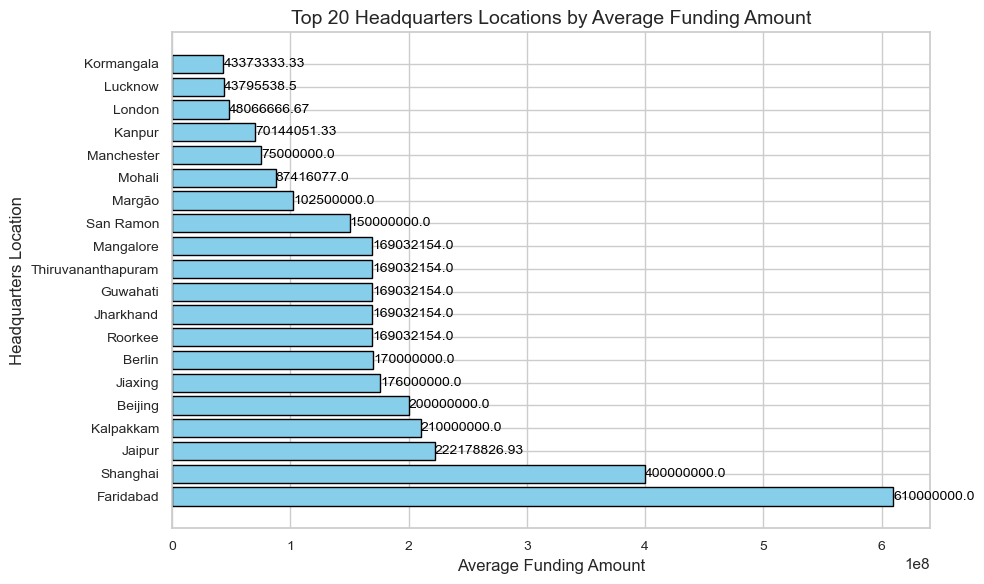

In [8]:
grouped = df.groupby('HeadQuarter')['Amount($)'].mean()

grouped = grouped.sort_values(ascending=False)

top_20 = grouped[:20]

# Create a horizontal bar chart to visualize the relationship between headquarters location and funding amounts
fig, ax = plt.subplots(figsize=(10, 6))  
# Customize the bar chart aesthetics
ax.barh(top_20.index, top_20.values, color='skyblue', edgecolor='black')  
ax.set_xlabel('Average Funding Amount', fontsize=12)
ax.set_ylabel('Headquarters Location', fontsize=12)  
ax.set_title('Top 20 Headquarters Locations by Average Funding Amount', fontsize=14) 

# Adjust the tick labels font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add data labels to the bars
for i, v in enumerate(top_20.values):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontsize=10, va='center')  # Adjust the label position and font size

plt.tight_layout() 
plt.show()


The Chart shows a significant difference in the funding received by locations. We can estimate that startups in the city of Faridabad received the most funds per the averages accumalated. 610 million was what the startups in the city were averaging. The nearest city to them which was Shanghai trailed by over 210 million. 

We can approximate that the related sector of the startups in this city could be a factor. 

## Further analysis of the data

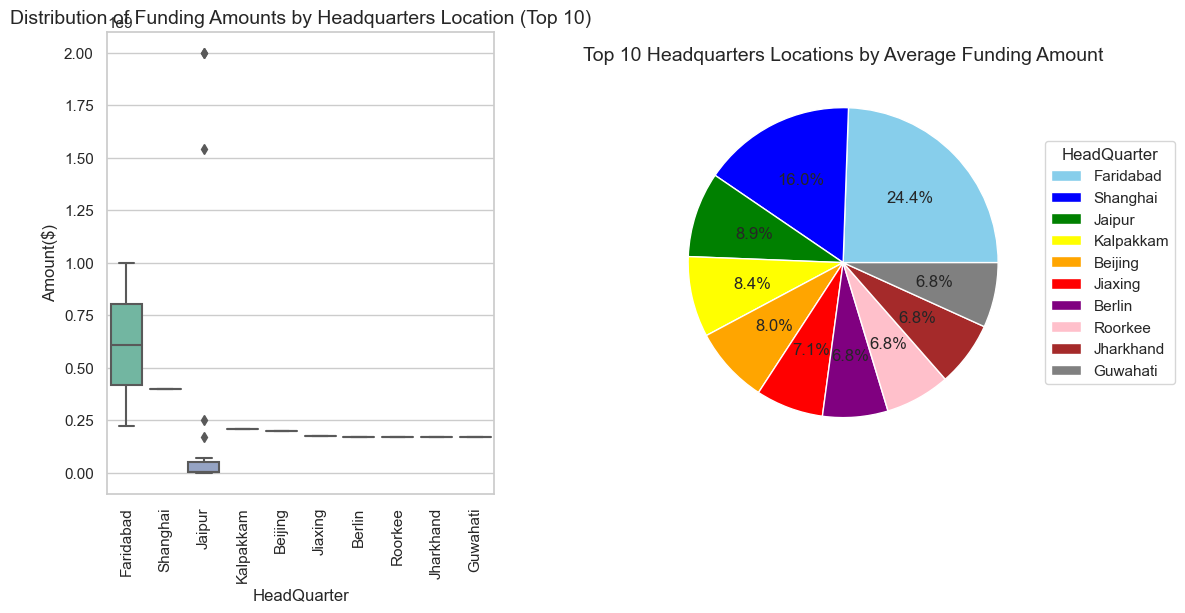

In [9]:
# Data for the box plot
grouped = df.groupby('HeadQuarter')['Amount($)'].mean()
grouped = grouped.sort_values(ascending=False)
top_10 = grouped[:10]

# Data for the pie chart
labels = top_10.index
values = top_10.values

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the box plot on the left subplot
axes[0].set_title('Distribution of Funding Amounts by Headquarters Location (Top 10)', fontsize=14)
axes[0].set_xlabel('HeadQuarter', fontsize=12)
axes[0].set_ylabel('Amount($)', fontsize=12)
sns.boxplot(x='HeadQuarter', y='Amount($)', data=df, order=top_10.index, palette='Set2', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Create the pie chart on the right subplot
axes[1].set_title('Top 10 Headquarters Locations by Average Funding Amount', fontsize=14)
pie = axes[1].pie(values, labels=None, autopct='%1.1f%%', colors=['skyblue', 'blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'gray'])
axes[1].legend(pie[0], labels, title='HeadQuarter', bbox_to_anchor=(1, 0.5), loc='center left')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


## The visuals above shows a consistent trend in the distribution and volume of the funding by the location. The city of Faridabad not only have the highest average by funding but the distribution in funding dispersion is also wide. In some instances a sysmetric movement we mean high volumn but not in this case 

## Question 5. 

## Does the number of investors in a company tend to impact the amount of funding it receives?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


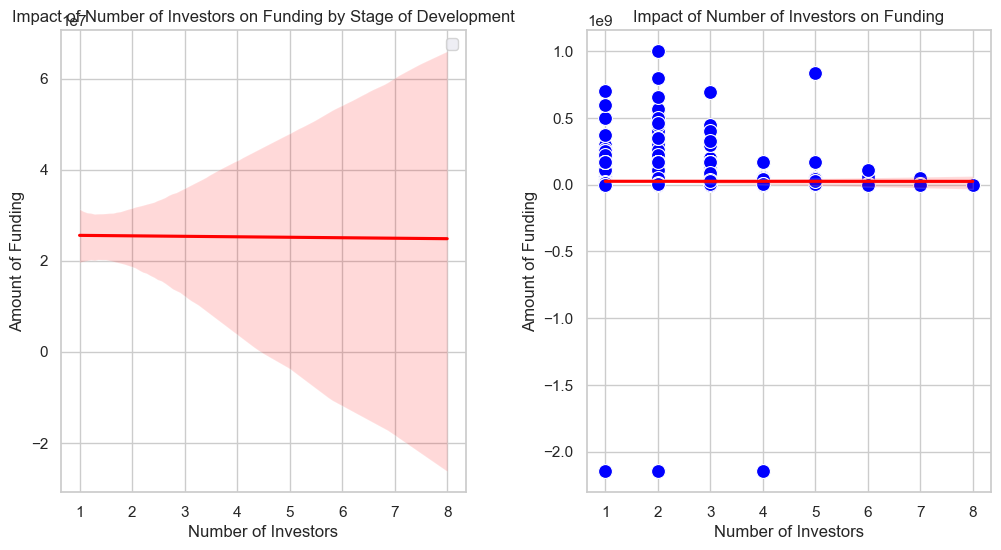

In [10]:
# Calculate total number of investors for each row
df1['total_investors'] = df1['Investor'].apply(lambda x: len(str(x).split(',')))

# Assign variables for scatter plot
number_of_investors = df1['total_investors']
amount_of_funding = df1['Amount($)']
stage_of_development = df1['Stage']

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot scatter plot on the left
sns.set_style("darkgrid")
stage_colors = {'Early Stage': 'blue', 'Growth Stage': 'green', 'Mature Stage': 'orange'}
for stage in stage_colors:
    stage_indices = df1[df1['Stage'] == stage].index
    sns.scatterplot(x=number_of_investors[stage_indices], y=amount_of_funding[stage_indices],
                    s=100, color=stage_colors[stage], label=stage, ax=ax1)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax1)
ax1.set_xlabel('Number of Investors')
ax1.set_ylabel('Amount of Funding')
ax1.set_title('Impact of Number of Investors on Funding by Stage of Development')
ax1.legend()

# Plot scatter plot on the right
sns.set_style("darkgrid")
sns.scatterplot(x=number_of_investors, y=amount_of_funding, s=100, color='blue', ax=ax2)
sns.regplot(x=number_of_investors, y=amount_of_funding, scatter=False, color='red', ax=ax2)
ax2.set_xlabel('Number of Investors')
ax2.set_ylabel('Amount of Funding')
ax2.set_title('Impact of Number of Investors on Funding')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


The horizontal trend observed in the scatter plot aligns with the weak correlation coefficient and supports the conclusion that there is no significant correlation. The data points scattered without a clear pattern further reinforce the lack of a strong relationship between the number of investors and the amount of funding. 

The distribution looks symetric on the 8 tally of investors it might suggest grand some of investment but the distribution is lean. 

There is another visuals showing the distribution and relationship between the stage of development of the business in relation to the amount and investors. It shows the same horizontal trend observed in the other plot and further reinforces the conclusion that the number of investors does not necessarily impact the funding amount. If there was a strong relationship, we would expect to see a clearer pattern or trend across different visualizations.

In summary, based on the scatter plot, weak correlation coefficient, lack of clear pattern, and consistency across different visuals, it can be concluded that the number of investors does not have a significant impact on the amount of funding. Other factors or variables may be more influential in determining funding amounts in this particular context.

## Further Analysis

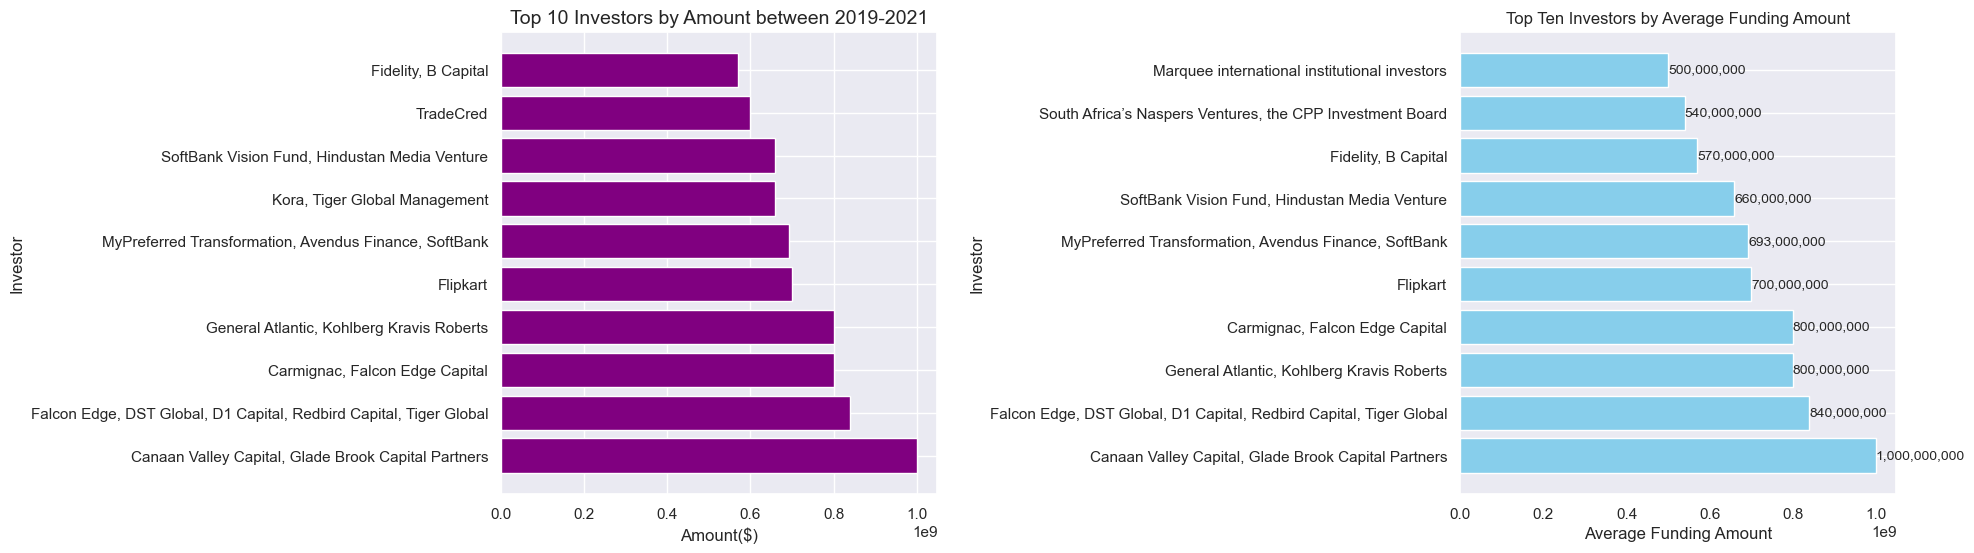

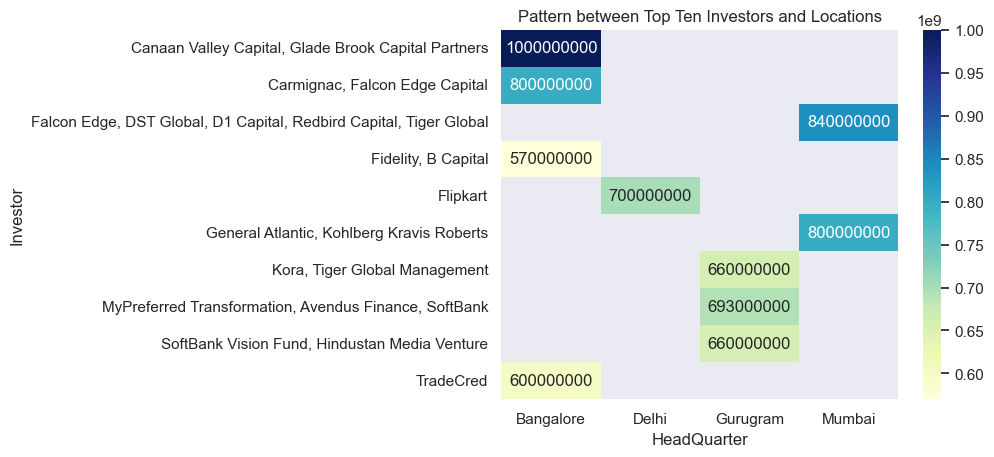

In [54]:
# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = df1.sort_values(by='Amount($)', ascending=False).head(10)

# Create a horizontal bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Left plot
ax1.barh(top_investors['Investor'], top_investors['Amount($)'], color='purple')
ax1.set_xlabel('Amount($)', fontsize=12)
ax1.set_ylabel('Investor', fontsize=12)
ax1.set_title('Top 10 Investors by Amount between 2019-2021', fontsize=14)

# Right plot
investor_avg_amount = df.groupby('Investor')['Amount($)'].mean()
top_10_investors = investor_avg_amount.sort_values(ascending=False).head(10)

ax2.barh(top_10_investors.index, top_10_investors.values, color='skyblue')
ax2.set_xlabel('Average Funding Amount')
ax2.set_ylabel('Investor')
ax2.set_title('Top Ten Investors by Average Funding Amount')
ax2.grid(axis='x')

# Add data labels to the bars in the right plot
for i, v in enumerate(top_10_investors.values):
    ax2.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

# Adjust subplot spacing
plt.subplots_adjust(wspace=1.2)

plt.show()

# Sort the dataframe by amount in descending order and select the top 10 investors
top_investors = df1.sort_values(by='Amount($)', ascending=False).head(10)

# Create a pivot table to aggregate the funding amounts by investor and location
heatmap_data = top_investors.pivot_table(values='Amount($)', index='Investor', columns='HeadQuarter', aggfunc='sum')

# Create a heatmap
# plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)

# Customize the chart
plt.xlabel('HeadQuarter')
plt.ylabel('Investor')
plt.title('Pattern between Top Ten Investors and Locations')


plt.show()



## The bar chart further buttresses the finding of the visuals above and the hypothesis testing. The number of investors was not significant in the distribution and volume of the  funding amount. Although the highest investor by funding was from a combination of 3 investors and 4 investors but then again there were more occurences of a single investor and a lower count of investors in many instances. 
## It wasnt the same case the with regards to the average funding amount contributed. Some names on the Top ten investors by volume amount contributed were not represented in the average amount bracket. The "TradeCred'' Investors were not captured in the average amount funding bracket However ''South Africa's Ventures,the CPP investment Board'' investors were captured in the top ten of the average amount funding. We can conclude that volume disbursal of funding does not really equate to the value per funding contribution.

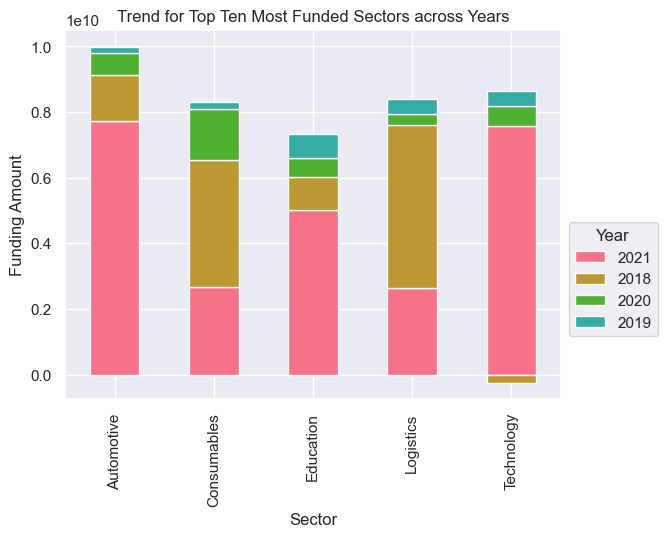

In [14]:
# Sort the DataFrame by the total funding amount for each sector in descending order
top_sectors = df.groupby('Sector')['Amount($)'].sum().nlargest(5).index

# Filter the DataFrame to include only the top ten sectors
df_top = df[df['Sector'].isin(top_sectors)]

# Pivot the DataFrame to have 'Year' as columns, 'Sector' as index, and 'Amount($)' as values
pivot_df = df_top.pivot_table(index='Sector', columns='Year', values='Amount($)', aggfunc='sum')

# Sort the columns of the pivoted DataFrame in descending order based on the total funding amount
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Set the plot style
sns.set_palette("husl")

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)
#                    figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Sector')
ax.set_ylabel('Funding Amount')
ax.set_title('Trend for Top Ten Most Funded Sectors across Years')

# Move the legend to the right side
ax.legend(title='Year', bbox_to_anchor=(1, 0.5), loc='upper left')

# Display the chart
plt.show()


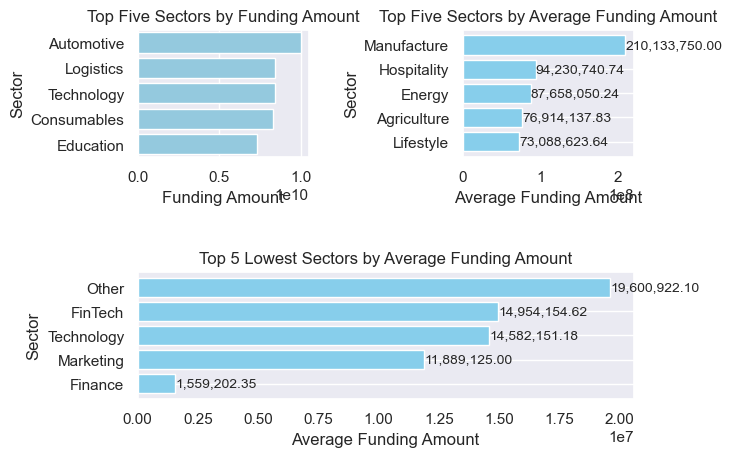

In [36]:

# Get the total funding amount for each sector and select the top 5 sectors
top_sectors = df.groupby('Sector')['Amount($)'].sum().nlargest(5)

# Create a bar plot for the top 5 sectors by funding amount
plt.subplot(2, 2, 1)
sns.barplot(x=top_sectors.values, y=top_sectors.index, color='skyblue')

# Set the axis labels and title
plt.xlabel('Funding Amount')
plt.ylabel('Sector')
plt.title('Top Five Sectors by Funding Amount')

# Get the average funding amount for each sector and select the top 5 sectors
top_sectors = df.groupby('Sector')['Amount($)'].mean().nlargest(5).sort_values()

# Create a horizontal bar chart
plt.subplot(2, 2, 2)
plt.barh(top_sectors.index, top_sectors.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('Sector')
plt.title('Top Five Sectors by Average Funding Amount')
plt.grid(axis='x')  # Add gridlines for better readability

# Add data labels to the bars
for i, v in enumerate(top_sectors.values):
    plt.text(v, i, f'{v:,.2f}', va='center', fontsize=10)


# Calculate the average funding amount for each sector
sector_avg_amount = df.groupby('Sector')['Amount($)'].mean()

# Sort the sectors by average funding amount in ascending order and select the top 5
top_lowest_sectors = sector_avg_amount.sort_values().head(5)

# Create a horizontal bar chart
plt.subplot(2, 1, 2)
plt.barh(top_lowest_sectors.index, top_lowest_sectors.values, color='skyblue')

# Customize the chart
plt.xlabel('Average Funding Amount')
plt.ylabel('Sector')
plt.title('Top 5 Lowest Sectors by Average Funding Amount')
plt.grid(axis='x')  # Add gridlines for better readability

# Add data labels to the bars
for i, v in enumerate(top_lowest_sectors.values):
    plt.text(v, i, f'{v:,.2f}', va='center', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.9, hspace=0.9)

# Display the plots
plt.show()


## This is a further analysis into the sector column to check the dynamics in the funding amount alloted in the course of the period. The case for all the scenarios were different. One well noted difference was the manufacturing sector average the highest amount despite it been recognize as one of lowest funded sector by volume and Technology sector averaging one of lowest by funding amount despite it big featuring in the heaviest funded sectors. 
## One can in a nutshell rationalize the point that the funds needed to operate a manufacturing company could be bigger in many cases than that of the technology company. 

In [77]:
df1 = pd.concat([df_2019, df_2020, df_2021])

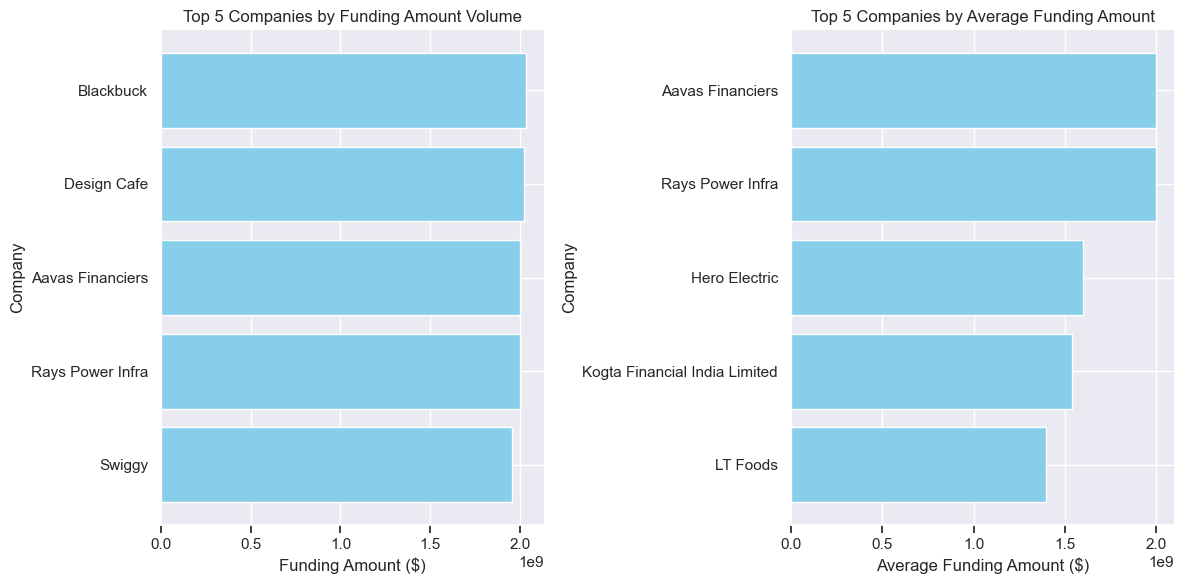

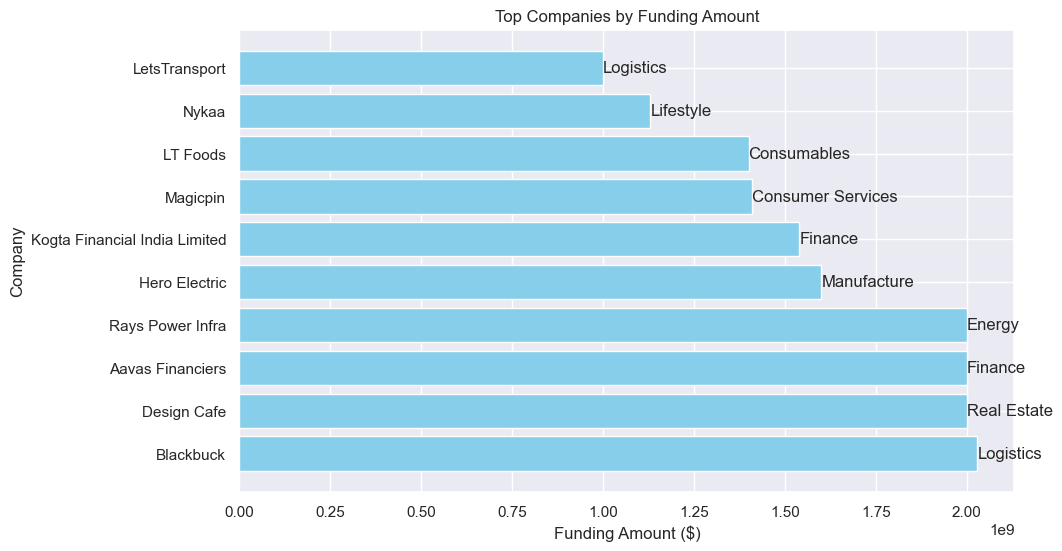

In [104]:
# Sort the DataFrame by the funding amount in descending order
top_companies_volume = df.groupby('Company/Brand')['Amount($)'].sum().nlargest(5)

# Extract the company names and funding amounts
companies_volume = top_companies_volume.index
funding_volume = top_companies_volume.values

# Sort the DataFrame by the average funding amount in descending order
top_companies_average = df.groupby('Company/Brand')['Amount($)'].mean().nlargest(5)

# Extract the company names and average funding amounts
companies_average = top_companies_average.index
funding_average = top_companies_average.values

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Top 5 Companies by Funding Amount Volume
ax1.barh(companies_volume, funding_volume, color='skyblue')
ax1.set_xlabel('Funding Amount ($)')
ax1.set_ylabel('Company')
ax1.set_title('Top 5 Companies by Funding Amount Volume')
ax1.invert_yaxis()  # Invert y-axis for better readability
ax1.spines['right'].set_visible(False)  # Remove right border
ax1.spines['top'].set_visible(False)  # Remove top border
ax1.tick_params(left=False, bottom=True)  # Hide left ticks, show bottom ticks

# Top 5 Companies by Average Funding Amount
ax2.barh(companies_average, funding_average, color='skyblue')
ax2.set_xlabel('Average Funding Amount ($)')
ax2.set_ylabel('Company')
ax2.set_title('Top 5 Companies by Average Funding Amount')
ax2.invert_yaxis()  # Invert y-axis for better readability
ax2.spines['right'].set_visible(False)  # Remove right border
ax2.spines['top'].set_visible(False)  # Remove top border
ax2.tick_params(left=False, bottom=True)  # Hide left ticks, show bottom ticks

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()

# Sort the DataFrame by the funding amount in descending order
top_companies = df.sort_values(by='Amount($)', ascending=False).head(10)

# Extract the company names and their respective sectors
companies = top_companies['Company/Brand']
sectors = top_companies['Sector']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(companies, top_companies['Amount($)'], color='skyblue')

ax.set_xlabel('Funding Amount ($)')
ax.set_ylabel('Company')
ax.set_title('Top Companies by Funding Amount')

# Add labels for the sectors
for i, company in enumerate(companies):
    sector = sectors.iloc[i]
    ax.text(top_companies['Amount($)'].iloc[i] + 100000, i, sector, ha='left', va='center')

plt.show()


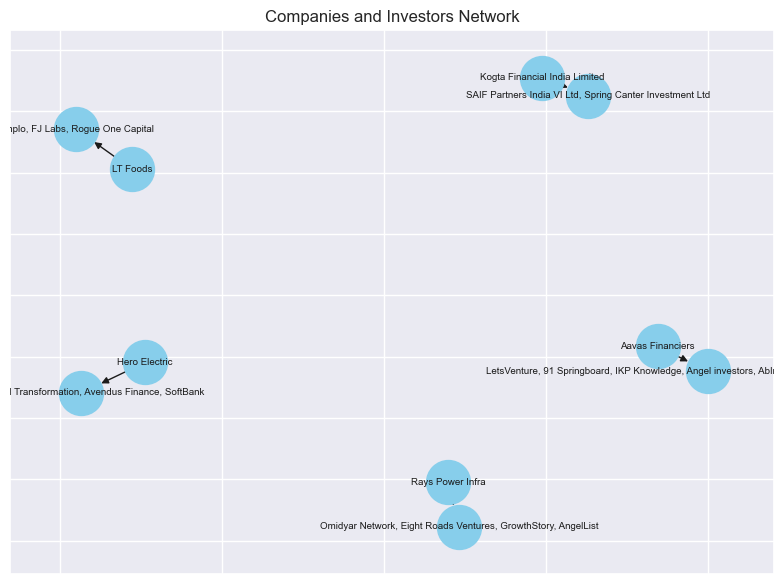

In [78]:
import networkx as nx

# Create a directed graph
G = nx.DiiGraph()

# Add edges between companies and investors
for i, company in enumerate(companies):
    investor = df1['Investor'].iloc[i]  # Corrected variable name
    G.add_edge(company, investor)

# Set node positions for better visualization
pos = nx.spring_layout(G)

# Create the network graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=7)

# Set title
plt.title('Companies and Investors Network 2019-2021')

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()


##  These series of visuals was to check the relationship between the companies, sectors and the investors and and funding amount available to them with the period. ''Lets Transport" was recorded the most funding amount with ''Avas Financiers'' averaging above 200 million dollars in funding. It is also interesting to note that the Finance sector which Avas Financiers fall under accounted for one of the lowest sectors within the period.

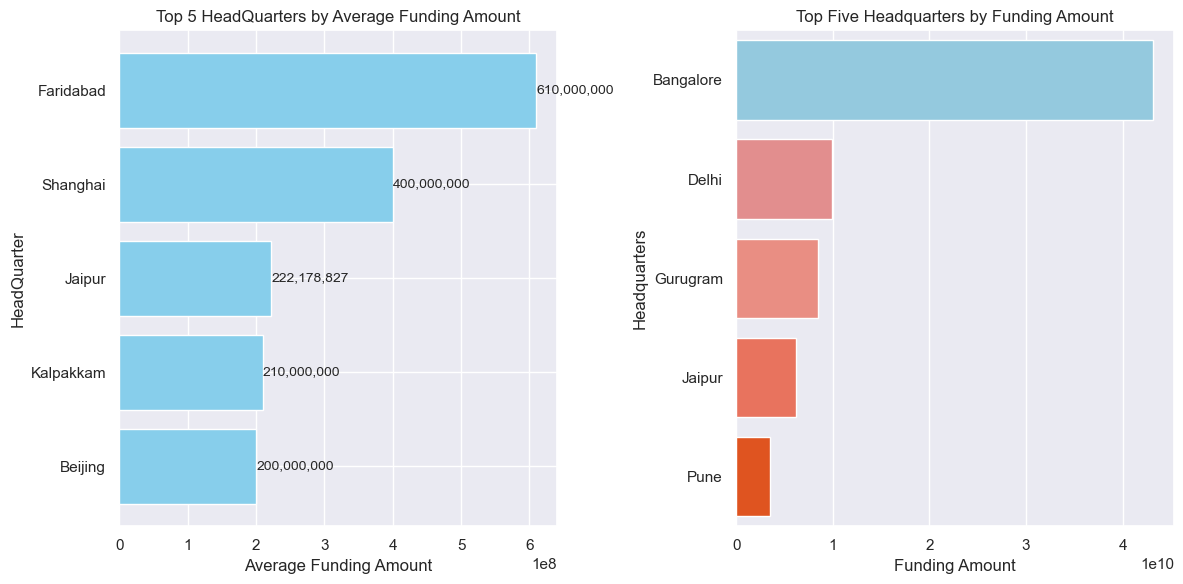

In [105]:
# Create a figure with two subplots, one on the left and the other on the right
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Group the data by HeadQuarter and calculate the average funding amount for each HeadQuarter
hq_avg_amount = df.groupby('HeadQuarter')['Amount($)'].mean()

# Sort the average funding amounts in descending order and select the top ten HeadQuarters
top_10_hq = hq_avg_amount.sort_values(ascending=False).head(5)

# Create a horizontal bar chart for the top 5 HeadQuarters by average funding amount
ax1.barh(top_10_hq.index, top_10_hq.values, color='skyblue')
ax1.set_xlabel('Average Funding Amount')
ax1.set_ylabel('HeadQuarter')
ax1.set_title('Top 5 HeadQuarters by Average Funding Amount')
ax1.invert_yaxis()  # Invert the y-axis to display HeadQuarters from top to bottom

# Add data labels to the bars
for i, v in enumerate(top_10_hq.values):
    ax1.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

# Get the total funding amount for each headquarters and select the top 5
top_headquarters = df.groupby('HeadQuarter')['Amount($)'].sum().nlargest(5)

# Create a custom color palette with red and skyblue shades
colors = ['skyblue', 'lightcoral', 'salmon', 'tomato', 'orangered']

# Create a bar plot for the top 5 headquarters by funding amount
sns.barplot(x=top_headquarters.values, y=top_headquarters.index, palette=colors, ax=ax2)
ax2.set_xlabel('Funding Amount')
ax2.set_ylabel('Headquarters')
ax2.set_title('Top Five Headquarters by Funding Amount')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## These series visuals is to briefly analyse the amount disbursal with regards to the location.The city of Faridabad averages the highest with the city of Bangalore accumulating the highest. One observation made for this difference was the freqency in the startup location. The city of Bangalore accounted for the most so the mode translated into affecting the funding amount. 

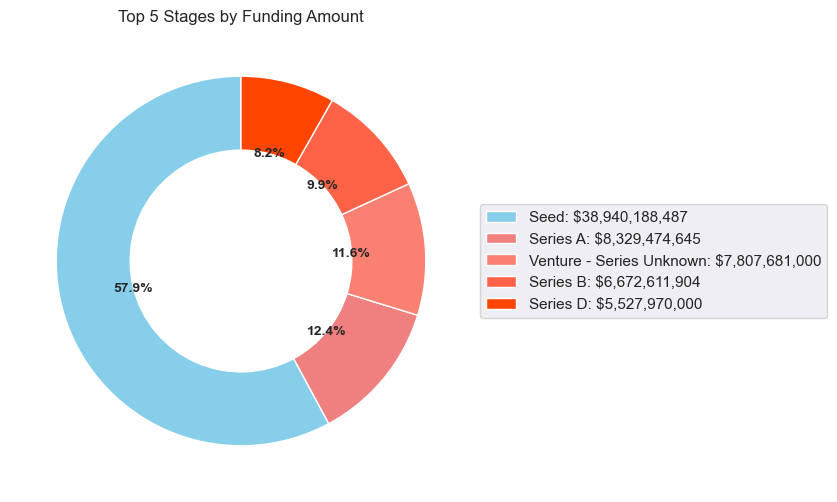

In [101]:
# Group the data by Stage and calculate the total funding amount for each stage
stage_total_amount = df.groupby('Stage')['Amount($)'].sum()

# Select the top 5 stages by funding amount
top_5_stages = stage_total_amount.nlargest(5)

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))

# Set colors for the donut chart
colors = ['skyblue', 'lightcoral', 'salmon', 'tomato', 'orangered']

# Create the inner and outer circles of the donut chart
inner_circle = plt.Circle((0, 0), 0.5, color='white')
outer_circle = plt.Circle((0, 0), 0.7, color='white')

# Add the inner and outer circles to the plot
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Create the donut chart with the top 5 stages
wedges, texts, autotexts = ax.pie(top_5_stages, colors=colors, autopct='%1.1f%%', startangle=90,
                                 wedgeprops=dict(width=0.4))

# Remove the labels from the chart
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=8)

# Set the title
ax.set_title('Top 5 Stages by Funding Amount')

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.set_aspect('equal')

# Create a legend for the chart on the far right side
legend_labels = [f'{stage}: ${amount:,.0f}' for stage, amount in zip(top_5_stages.index, top_5_stages.values)]
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()


## This is a short analysis in the amount realized by the category of the stage of development of startups within the period. 
## Seed Stage recorded the highest funding in tune of over $38 billion. 